# Prediction of the Prescribed Drug on basis of Medical Report

<h2> Contents of the Dataset </h2>

The dataset contains information fo patients and their respective medical diagnostic report. In curing of the disease on the basis of the this medical report, each patient here responds to one of the 5 Drugs. 

The following are the associated columns for the dataset.

1. Age        --> Provides the age of the patient
2. Gender     --> Gives the gender of the patient
3. BP         --> Medical Diagnostic Report for the Blood Pressure of the patient
4. Cholestrol --> Medical Diagnostic Report for the Cholestrol Level of the patient
5. Drug       --> The actual Drug to which the patient responded in the treatment

<h2> Data Related Information </h2>

The following dataset was obtained from CognitiveClass and Coursera's IBM ML Course. The data has labels which makes it well suited for Supervised Learning Methods.

<h2> The Problem Statement </h2>

The agency in this scenario want's the automate the Drug Assignment Process as in which just by feeding the patients details into the model, the drug which can be given to patient for treatment for the problem can be known. This would make sure that the Drug is provided to the patient as early as possible even if the doctors aren't available on the scene to suggest the prescribed drug for the patient.

<h2> The Problem Statement Execution Plan </h2>

The following is the execution plan to analyze the problem statement.


<h4> Loading the Dataset </h4>

The dataset is loaded in the Jupyter Notebook Environment via the !wget method provided by Jupyter. 

<h4> Data Preprocessing </h4>

1. Removing Null Valued Columns
2. Removing Data Type Errors
3. Feature Selection
4. One-Hot Encoding for the categorical Columns
5. Splitting the data into a train-test split model.
6. Normalizing the dataset

<h4> Data Analysis and Wrangling </h4>

1. Understanding Column correlations.
2. Building visualizations to figure out the pattern/trends.

<h4> Building the model </h4>
    
1. Selecting the dependent and Independent variables
2. Builidng ML Classification Models
3. Analyzing the model accuracy for each model.
4. Building Neural Network and analyzing the network.
5. Scaling the model (if required) on Apache Spark.

<h4> Problem Conclusions </h4>

1. Checking the model with unseen data.
2. Building Visualizations to analyze the performance.
3. Concluding the problem statement with results.




<h2> Loading the dataset </h2>

In [113]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2020-02-20 15:28:53--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

100%[======================================>] 6,027       --.-K/s   in 0s      

2020-02-20 15:28:54 (657 MB/s) - ‘drug200.csv’ saved [6027/6027]



<h2> Importing Essential Libraries </h2>

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h2> Viewing the data </h2>

In [115]:
medical = pd.read_csv('drug200.csv')
medical.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


<h2> Basic Data Preprocessing </h2>

In [116]:
# Checking for missing values

medical.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [117]:
#Checking the datatypes of the columns

medical.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [118]:
#Summary for the dataset

print(medical.describe()) #Prints statistical Summary
print(medical.shape) #Prints the size of the dataset

              Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000
(200, 6)


<h2> The Data Preprocessing Conclusions </h2>

<h4> Basic Conclusions </h4>

1. The Obtained DataSet has no missing values
2. The dataypes of individual columns in the dataset is correct
3. The dataset has 200 rows and 6 columns    

<h4> Basic Statistical Conclusions </h4>
    
1. The mean age for the patients in the dataset is 44 years. 
2. The recorded age range is from 15-74 years with 50% data recorded is below age 45.
3. Na_to_K (Sodium to potassium level) on average is 16. 
4. The maximum and minimum range of Na_to_K levels are (6-38)

<h2> Basic Data Visualizations </h2>

<h2> Plotting the Seaborn Pairplot </h2>


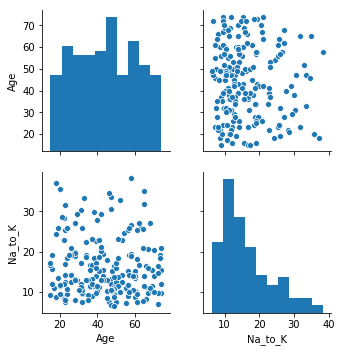

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(medical)
plt.show()

<h2> Analysis from the Pairplots </h2>

The Na_to_K (Sodium to Pottasium Level) is sparsly populated with Age. No linear/ periodic trend is avaliable between the Na_to_K level and Age. This shows that therese two columns offer a neutral correlation value.

Na_to_K Level histogram shows Positive Skewed dataset with majority of the values between 10-20 range. We would further analyse the Na_to_K level through the help of the box plot to know.

<h2> Plotting the Box Plot </h2>

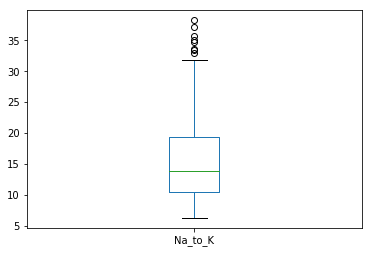

In [120]:
medical['Na_to_K'].plot(kind='box')
plt.show()

The box plot shows that the mean value of Na_to_K Level in the mentioned report is nearly equal to 14. There are outliers present above the range 32 which with the help of further preprocessing is removed.

<h2> Data Wrangling - Label Indexing </h2>

In [121]:
#Label Indexing of all the categorical columns

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
le.fit(['NORMAL','HIGH'])
medical['Cholesterol'] = le.transform(medical['Cholesterol'])

le = preprocessing.LabelEncoder()
le.fit(['M','F'])
medical['Sex'] = le.transform(medical['Sex'])

le = preprocessing.LabelEncoder()
le.fit(['LOW','NORMAL','HIGH'])
medical['BP'] = le.transform(medical['BP'])

medical1 = medical
     
medical.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


<h2> Analyzing the Label Indexer Values </h2>

1. Label Indexing Sex Column
   (0 = Male)
   (1 = Female)
   
2. Label Indexing BP Column
   (0 = Low BP)
   (1 = Normal BP)
   (2 = High BP)
   
3. Label Indexing Cholesterol Column
   (0 = Normal Cholesterol)
   (1 = High Cholesterol)

<H2> Getting the data ready for Model Development - Feature Selection </H2>

In [122]:
X_data = medical[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y_data = medical['Drug']

#Converting to Numpy Arrays

x = X_data.values
y = Y_data.values


<h2> Implementing the Train-Test Split </h2>

In [123]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

<H2> Implementing ML Algorithm - Decision Tree </H2>

In [124]:
#Training the model

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
decisiontree.fit(x_train, y_train)

yhat = decisiontree.predict(x_test)

In [125]:
#Evalutaing the model

from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,yhat)
print("The Accuracy of the model is : {}".format(accuracy))

The Accuracy of the model is : 0.95


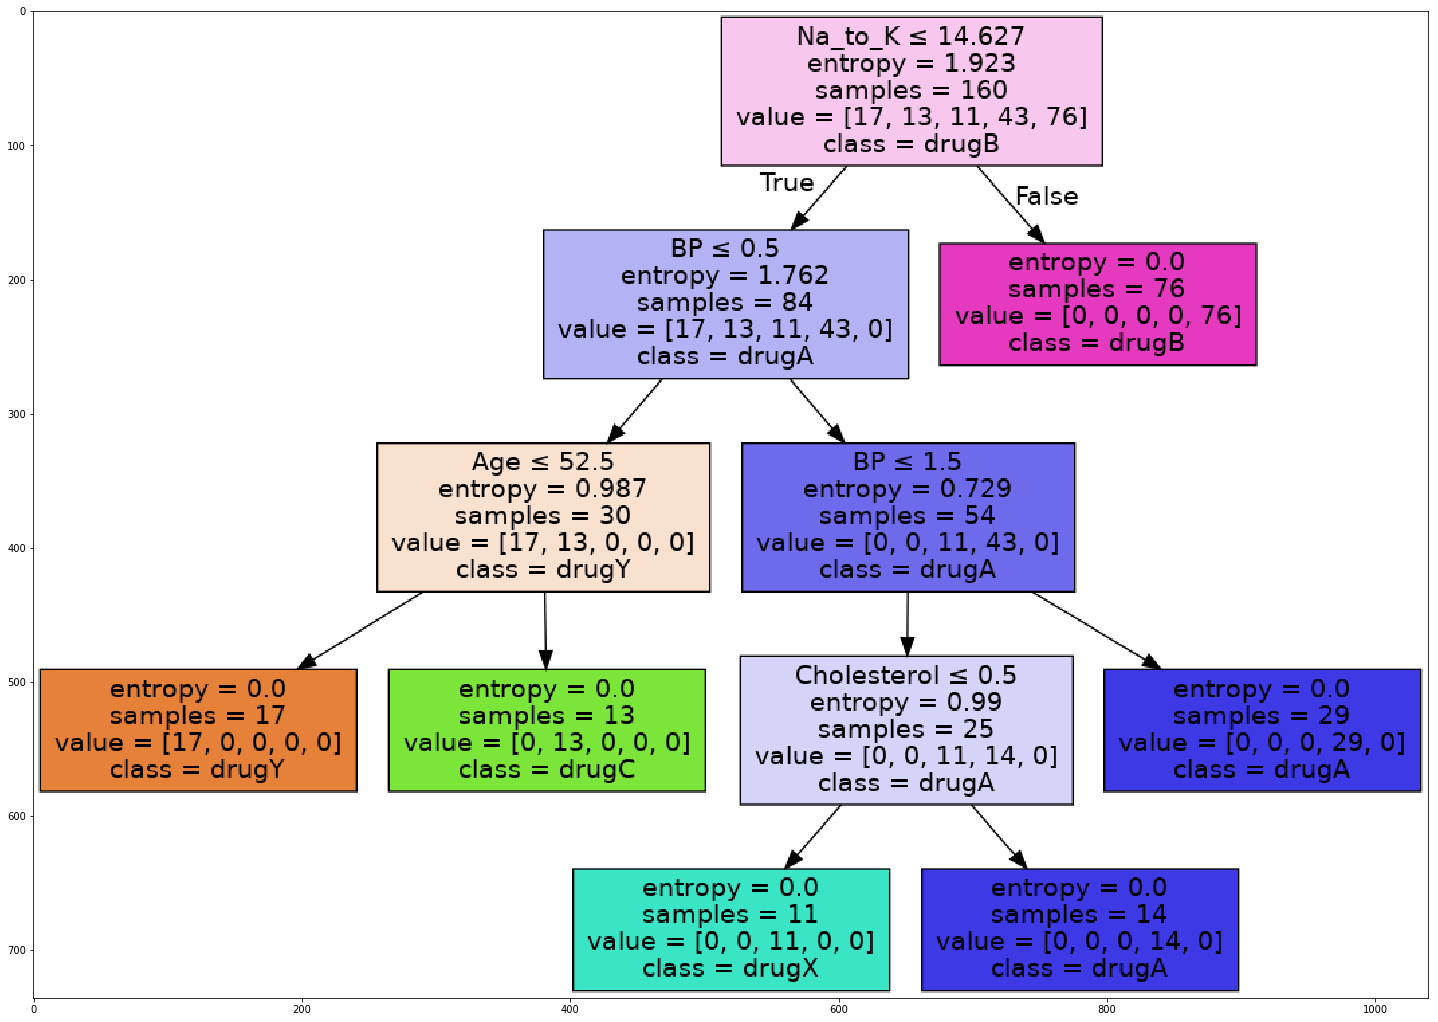

In [126]:
#Visualizing the decision Tree

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

data = StringIO()
filename = "tree.png"

featureNames = X_data.columns
targetNames = medical['Drug'].unique().tolist()

out = tree.export_graphviz(decisiontree, feature_names=featureNames, out_file=data, class_names=targetNames, filled=True, special_characters=True, rotate=False)

graph = pydotplus.graph_from_dot_data(data.getvalue())

graph.write_png(filename)
img = mpimg.imread(filename)
 
plt.figure(figsize=(25,25))
plt.imshow(img, interpolation='nearest')

 <h2> Conclusions from Decision Tree Algorithm </h2>

1. Obtained Accuracy from the model - 95.0%

2. The Sodium to Pottasium Level in blood (Na_to_K) emerged as the biggest factor in Drug Prediction. Any Level greater than 14.627 was presctibed Drug B with 100% Accuracy 

3. Further Analysis can be done through the decision tree generated.

<h2> Implementing a K-Means Classification Algorithm </h2>


In [127]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
model = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2).fit(x_train,y_train)

yhat = model.predict(x_test)

In [128]:
accuracy = metrics.accuracy_score(y_test, yhat)

print("The Accuracy of the model is = {}".format(accuracy))

The Accuracy of the model is = 0.65


<h2> Finding the best value of K </h2>

Since the model accuracy is pretty low we with initialized value of k=5 via the elbow method we try to find the best value of k.

In [129]:
kvalues = 20   # Initializing values of k to be from 1-20

mean_value = np.zeros((kvalues-1))
std_value = np.zeros((kvalues-1))

confusionmatrix = []

for n in range(1, kvalues):
    
    model = KNeighborsClassifier(n_neighbors=k, metric='minkowski',p=2).fit(x_train,y_train)
    yhat = model.predict(x_test)
    
    mean_value[n-1] = metrics.accuracy_score(y_test, yhat)
    std_value[n-1] = np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

    
print("The best value of K = {}".format(mean_value.argmax()+1))

The best value of K = 1


<h2> Conclusions from the K-Means Algorithm </h2>

The model here predicted the value of K=1, which isn't suggested in the machine learning algorithm, hence the K-Means CLustering method doesn't fits the data well and fails to do classification.

<h2> Making a Neural Network </h2>

To obatin and search for higher accuracy and better model building methods, we prepare a neural network. The basic configurations of the neural network to classify the drug is as under:

<h2> Importing the Required Libraries </h2>

In [157]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.models import Sequential

from keras.utils import to_categorical

<h2> Making the data ready </h2>

In [160]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
    
medical = pd.read_csv('drug200.csv')

from sklearn import preprocessing 

le = preprocessing.LabelEncoder()
le.fit(['NORMAL','HIGH'])
medical['Cholesterol'] = le.transform(medical['Cholesterol'])

le = preprocessing.LabelEncoder()
le.fit(['M','F'])
medical['Sex'] = le.transform(medical['Sex'])

le = preprocessing.LabelEncoder()
le.fit(['LOW','NORMAL','HIGH'])
medical['BP'] = le.transform(medical['BP'])

#Creating Dummies for the target variable

dummy = pd.get_dummies(medical['Drug'])
medical = pd.concat([medical,dummy],axis=1)
     
medical.head()

--2020-02-20 16:11:23--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

100%[======================================>] 6,027       --.-K/s   in 0s      

2020-02-20 16:11:23 (569 MB/s) - ‘drug200.csv’ saved [6027/6027]



,Age,Sex,BP,Cholesterol,Na_to_K,Drug,drugA,drugB,drugC,drugX,drugY
0,23,0,0,0,25.355,drugY,0,0,0,0,1
1,47,1,1,0,13.093,drugC,0,0,1,0,0
2,47,1,1,0,10.114,drugC,0,0,1,0,0
3,28,0,2,0,7.798,drugX,0,0,0,1,0
4,61,0,1,0,18.043,drugY,0,0,0,0,1


<h2> Feature Selection for Neural Network </h2>

In [162]:
X_data = medical[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y_data = medical[['drugA','drugB','drugC','drugX','drugY']]

#Converting to Numpy Arrays

x = X_data.values
y = Y_data.values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

<h2> Training the Neural Network </h2>

In [168]:
model = Sequential()

model.add(Dense(200, activation='relu', input_shape=(5,)))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

model.fit(x_train,y_train, batch_size=10, epochs=50, validation_data=(x_test,y_test))

Train on 160 samples, validate on 40 samples
Epoch 1/50
160/160 [==============================] - 18s 110ms/step - loss: 5.2489 - acc: 0.3938 - val_loss: 4.0171 - val_acc: 0.3750
Epoch 2/50
160/160 [==============================] - 19s 118ms/step - loss: 4.1009 - acc: 0.3688 - val_loss: 1.5445 - val_acc: 0.6000
Epoch 3/50
160/160 [==============================] - 20s 127ms/step - loss: 1.6296 - acc: 0.5000 - val_loss: 1.2752 - val_acc: 0.3750
Epoch 4/50
160/160 [==============================] - 20s 126ms/step - loss: 1.1715 - acc: 0.5438 - val_loss: 1.2430 - val_acc: 0.4250
Epoch 5/50
160/160 [==============================] - 20s 127ms/step - loss: 1.0428 - acc: 0.5813 - val_loss: 1.1638 - val_acc: 0.4500
Epoch 6/50
160/160 [==============================] - 18s 112ms/step - loss: 1.1305 - acc: 0.4938 - val_loss: 1.1488 - val_acc: 0.5500
Epoch 7/50
160/160 [==============================] - 19s 117ms/step - loss: 1.0826 - acc: 0.5438 - val_loss: 1.1900 - val_acc: 0.4750
Epoch 8/50

<h2> Model Evaluation </h2>

In [170]:
score = model.evaluate(x_test,y_test, verbose=0)
print(score[0])
print(score[1])

1.0797407150268554
0.6


<h2> Analyzing the Basic Neural Network and Conclusions </h2>

1. With the neural network trained above the accuracy was 60%
2. The Build Neural Network had 2 Dense Layers and 1 Dropout Layer

We can build a more advanced Neural Network with deeper layers and combination of activation functions to achieve a much higher accuracy.